<a href="https://colab.research.google.com/github/alejandromunizsiques/Nuevo-repositorio/blob/main/Ejercicio_de_predicci%C3%B3n_de_precios_de_viviendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de liberias


In [2]:
#Visualizacion y limpieza de datos
import pandas as pd
import numpy as py
# Analisis Exploratorio de los datos
!pip install klib
!pip install --upgrade klib
import klib as klib
# division de entrenamiento para  ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Montaje del dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Introducción al Machine Learning/kc_house_data.csv')


# Tabulacion Dataset

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Analisis Exploratorio (Correlacional)

AxesSubplot(0.125,0.125;0.62x0.755)


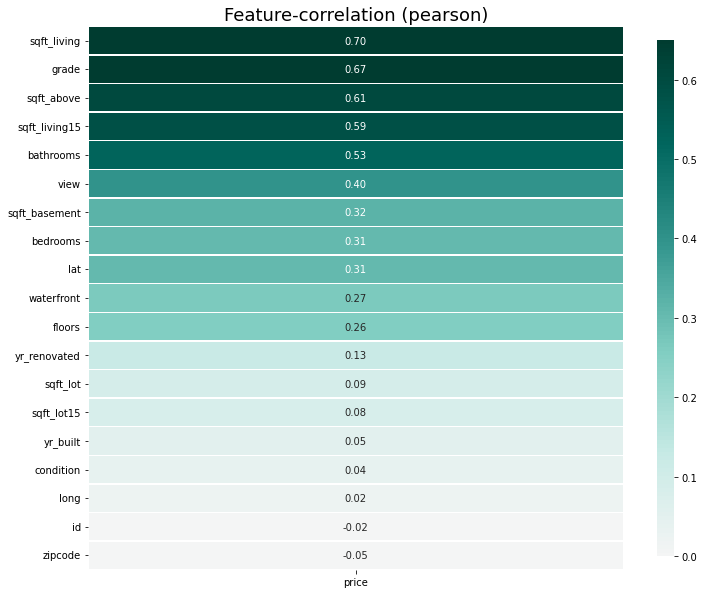

In [7]:
a = klib.corr_plot(df, target='price')


# Generacion de Matriz de Feature y Target, separacion de entrenamiento y prueba

In [20]:
df1 = df.drop(["yr_renovated","sqft_lot","sqft_lot15","yr_built","condition","long","id","zipcode","date"],axis=1)
X = df1.drop(["price"],axis=1)
y = df1["price"]

#separacion de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=3)


# Generacion de arbol de decision (Bagging Regresor)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

BaggingRegressor_Model = BaggingRegressor(n_estimators=15, bootstrap=True, random_state=1)
print(BaggingRegressor_Model)

BaggingRegressor(n_estimators=15, random_state=1)


# Entrenamiento Bagging Regresor

In [24]:
BaggingRegressor_Model.fit(X_train,y_train)

BaggingRegressor(n_estimators=15, random_state=1)

# Evaluacion del modelo Primera Instancia


In [28]:
test_predictions = BaggingRegressor_Model.predict(X_test)
Score_bagging = BaggingRegressor_Model.score(X_test,y_test)
Score_bagging

0.8039961098656191

# Modificacion de Hiperparametro

In [29]:
Max_n_Estimators = list(range(10,100))

Accurcy = []

for Estimators in Max_n_Estimators:
  BaggingRegressor_Model = BaggingRegressor(n_estimators=Estimators,random_state=3)

  BaggingRegressor_Model.fit(X_train,y_train)
  Score_bagging = BaggingRegressor_Model.score(X_test,y_test)
  Accurcy.append(Score_bagging)

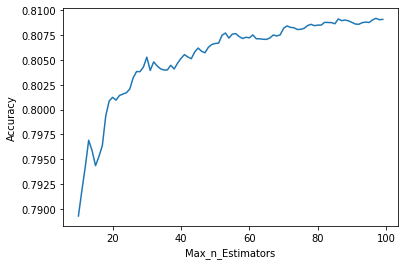

In [33]:
import matplotlib.pyplot as plt
plt.plot(Max_n_Estimators, Accurcy)
plt.xlabel('Max_n_Estimators')
plt.ylabel('Accuracy');

# Generacion de modelo Random Forest Regression

In [35]:
RandomForestRegressor_Model = RandomForestRegressor(n_estimators=150,max_depth=5)
print(RandomForestRegressor_Model)

RandomForestRegressor(max_depth=5, n_estimators=150)


# Entrenamiento 

In [36]:
RandomForestRegressor_Model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

# Evaluacion del modelo a primera instanica

In [37]:
Predict_Forest = RandomForestRegressor_Model.predict(X_test)
Score_Forest = RandomForestRegressor_Model.score(X_test,y_test)
Score_Forest


0.7406462335797763

# Modificacion HiperParametro "Profundidad"

In [39]:
max_n_depth = list(range(2,20))

Accurcy2 = []

for deph in max_n_depth:
  RandomForestRegressor_Model = RandomForestRegressor(max_depth=deph,random_state=3,n_estimators=150)

  RandomForestRegressor_Model.fit(X_train,y_train)
  Score_Forest = RandomForestRegressor_Model.score(X_test,y_test)
  Accurcy2.append(Score_bagging)


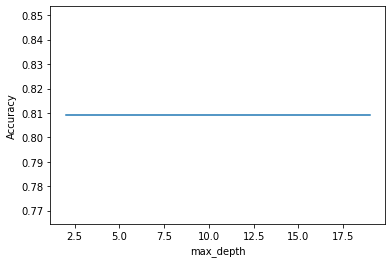

In [41]:
plt.plot(max_n_depth, Accurcy2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy');